In [1]:
# import libraries
import numpy as np
import torch 

# NEW!
import torchvision
import torchvision.transforms as T

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\DOANTR~1\AppData\Local\Temp/ipykernel_21812/2361971996.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# Import a dataset

In [ ]:
# The list of datasets that come with torchvision: https://pytorch.org/vision/stable/index.html

In [2]:
# download the CIFAR10 dataset
c_data = torchvision.datasets.CIFAR10(root='cifar10', download=True)


print(c_data)

170499072it [02:03, 1384979.55it/s]                               


Extracting cifar10\cifar-10-python.tar.gz to cifar10
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


In [3]:
# Check out the shape of the dataset
print(c_data.data.shape)

# The unique categories
print(c_data.classes)

# .targets is a list of targets converted to ints
print(len(c_data.targets))

(50000, 32, 32, 3)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
50000


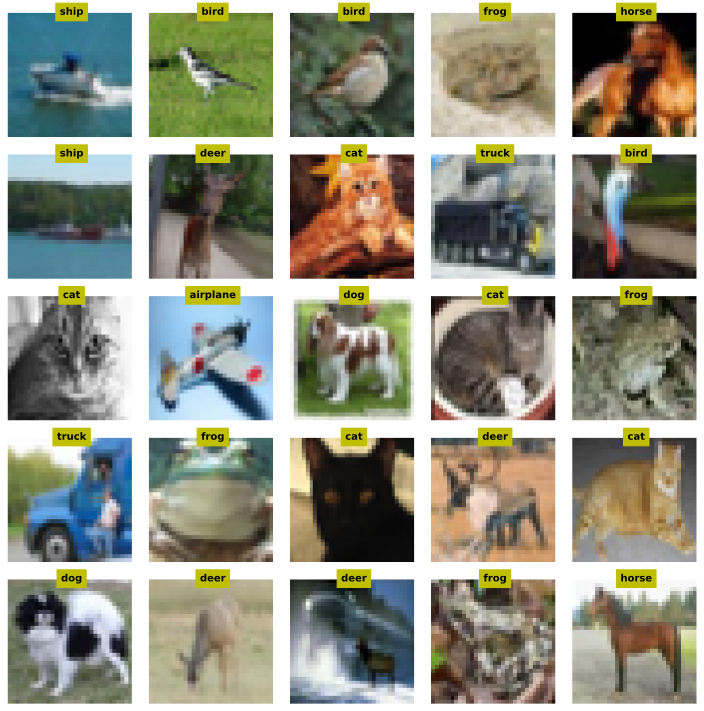

In [4]:
# Inspect a few random images
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for ax in axs.flatten():
    
    # Select a random picture
    rand_idx = np.random.choice(len(c_data.targets))
    
    # Extract that image
    pic = c_data.data[rand_idx, :, :, :]
    
    # And its label
    label = c_data.classes[c_data.targets[rand_idx]]
    
    # And show!
    ax.imshow(pic)
    ax.text(16, 0, label, ha='center', fontweight='bold', color='k', backgroundcolor='y')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Apply some transformations

In [5]:
# Group multiple image transformation into 01 object
Ts = T.Compose([T.ToTensor(),
                T.Resize(size=32*4), # Increase the resolution by a factor of 4
                T.Grayscale(num_output_channels=1)])

# Include the transform in the dataset
c_data.transform = Ts

# You can also apply the transforms immediately when loading in the data
# Cdata = torchvision.datasets.cifar10(root='cifar10', download=true, transform=ts)

# Important! Adding a transform doesn't change the image data:
print(c_data.data[123, :, :, :].shape)


(32, 32, 3)


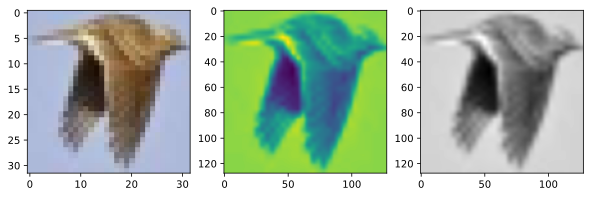

In [7]:
# Apply the transform

# Option 1a: apply the transform "externally" to an image
img_1 = Ts(c_data.data[123, :, :, :])

# Option 1b: use the embedded transform
img_2 = c_data.transform(c_data.data[123, :, :, :])

# Let's see what we've done!
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
ax[0].imshow(c_data.data[123, :, :, :])
ax[1].imshow(torch.squeeze(img_1))
ax[2].imshow(torch.squeeze(img_2), cmap='gray')

plt.show()


In [ ]:
# Note about ToTensor() and normalization:
??T.ToTensor()

# Additional explorations

In [ ]:
# 1) There are many other transforms available in torchvision: https://pytorch.org/vision/stable/transforms.html
#    Many transformations are useful for data preparation and augmentation. We'll cover some of them later in the course,
#    but for now, read about RandomCrop(), RandomHorizontalFlip(), and CenterCrop(). Then implement them to understand 
#    what they do to images.
#    Tip: It's probably best to test these transforms separately, and on one test image, as we did above.
# 